In [1]:
import PIL.Image as pilimg
import numpy as np
import os

In [2]:
path_train_cats = '../dataset/training_set/cats'
path_train_dogs = '../dataset/training_set/dogs'
path_test_cats = '../dataset/test_set/cats'
path_test_dogs = '../dataset/test_set/dogs'

In [3]:
file_list_train_cats = os.listdir(path_train_cats)
file_list_train_dogs = os.listdir(path_train_dogs)
file_list_test_cats = os.listdir(path_test_cats)
file_list_test_dogs = os.listdir(path_test_dogs)

In [4]:
file_list_train_cats.sort() #4000개
file_list_train_dogs.sort() #4000개
file_list_test_cats.sort() #1000개
file_list_test_dogs.sort() #1000개

In [5]:
# # 흑백 전처리
# train_cats = []
# train_dogs = []
# for i in range(len(file_list_train_cats)-1):
#     train_number = i+1
#     path_cats = path_train_cats+"/"+file_list_train_cats[train_number]
#     path_dogs = path_train_dogs+"/"+file_list_train_dogs[train_number]
#     img_cats = pilimg.open(path_cats)
#     img_cats = img_cats.convert('L')
#     img_cats = img_cats.resize((28,28))
#     train_cats.append(np.array(img_cats).astype(np.float32))
#     img_dogs = pilimg.open(path_dogs)
#     img_dogs = img_dogs.convert('L')
#     img_dogs = img_dogs.resize((28,28))
#     train_dogs.append(np.array(img_dogs).astype(np.float32))
# train_cats = np.array(train_cats)
# train_dogs = np.array(train_dogs)

In [6]:
# 컬러 전처리
train_cats = []
train_dogs = []
for i in range(len(file_list_train_cats)-1):
    train_number = i+1
    path_cats = path_train_cats+"/"+file_list_train_cats[train_number]
    path_dogs = path_train_dogs+"/"+file_list_train_dogs[train_number]
    img_cats = pilimg.open(path_cats)
    img_cats = img_cats.resize((150,150))
    train_cats.append(np.array(img_cats).astype(np.float32))
    img_dogs = pilimg.open(path_dogs)
    img_dogs = img_dogs.resize((150,150))
    train_dogs.append(np.array(img_dogs).astype(np.float32))
train_cats = np.array(train_cats)
train_dogs = np.array(train_dogs)

In [7]:
# train_cats_label = []
# train_dogs_label = []
# for i in range(len(file_list_train_cats)-1):
#     cat_label = np.array([1,0])
#     dog_label = np.array([0,1])
#     train_cats_label.append(cat_label)
#     train_dogs_label.append(dog_label)
# train_cats_label = np.array(train_cats_label)
# train_dogs_label = np.array(train_dogs_label)

In [8]:
train_cats_label = np.zeros(4000)
train_dogs_label = np.ones(4000)

In [9]:
# # 흑백 전처리
# test_cats = []
# test_dogs = []
# for i in range(len(file_list_test_cats)-1):
#     test_number = i+1
#     path_cats = path_test_cats+"/"+file_list_test_cats[test_number]
#     path_dogs = path_test_dogs+"/"+file_list_test_dogs[test_number]
#     img_cats = pilimg.open(path_cats)
#     img_cats = img_cats.convert('L')
#     img_cats = img_cats.resize((28,28))
#     test_cats.append(np.array(img_cats).astype(np.float32))
#     img_dogs = pilimg.open(path_dogs)
#     img_dogs = img_dogs.convert('L')
#     img_dogs = img_dogs.resize((28,28))
#     test_dogs.append(np.array(img_dogs).astype(np.float32))
# test_cats = np.array(test_cats)
# test_dogs = np.array(test_dogs)

In [10]:
# 컬러전처리
test_cats = []
test_dogs = []
for i in range(len(file_list_test_cats)-1):
    test_number = i+1
    path_cats = path_test_cats+"/"+file_list_test_cats[test_number]
    path_dogs = path_test_dogs+"/"+file_list_test_dogs[test_number]
    img_cats = pilimg.open(path_cats)
    img_cats = img_cats.resize((150,150))
    test_cats.append(np.array(img_cats).astype(np.float32))
    img_dogs = pilimg.open(path_dogs)
    img_dogs = img_dogs.resize((150,150))
    test_dogs.append(np.array(img_dogs).astype(np.float32))
test_cats = np.array(test_cats)
test_dogs = np.array(test_dogs)

In [11]:
# test_cats_label = []
# test_dogs_label = []
# for i in range(len(file_list_test_cats)-1):
#     cat_label = np.array([1,0])
#     dog_label = np.array([0,1])
#     test_cats_label.append(cat_label)
#     test_dogs_label.append(dog_label)
# test_cats_label = np.array(test_cats_label)
# test_dogs_label = np.array(test_dogs_label)

In [12]:
test_cats_label = np.zeros(1000)
test_dogs_label = np.ones(1000)

In [13]:
x_train = np.vstack([train_cats, train_dogs])
y_train = np.hstack([train_cats_label, train_dogs_label])
x_test = np.vstack([test_cats, test_dogs])
y_test = np.hstack([test_cats_label, test_dogs_label])

In [14]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 150, 150, 3), (8000,), (2000, 150, 150, 3), (2000,))

#### 신경망 구조

In [15]:
from keras import models
from keras import layers
from keras import regularizers

# keep_prob = 0.5

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


#### 컴파일 단계

In [16]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### 이미지 데이터 준비하기

In [17]:
train_images = x_train.reshape((8000, 150,150,3))
train_images = train_images.astype('float32')/255

test_images = x_test.reshape((2000, 150,150,3))
test_images = test_images.astype('float32')/255

In [18]:
train_images.shape, test_images.shape

((8000, 150, 150, 3), (2000, 150, 150, 3))

#### 레이블 준비하기

In [19]:
from keras.utils import to_categorical

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [20]:
train_labels.shape, test_labels.shape

((8000, 2), (2000, 2))

#### 훈련 데이터에 모델을 학습

In [21]:
history = model.fit(train_images, train_labels, epochs=35, batch_size=256)

Instructions for updating:
Use tf.cast instead.
Epoch 1/35
8000/8000 [==============================] - 146s 18ms/step - loss: 0.6873 - acc: 0.5345
Epoch 2/35
8000/8000 [==============================] - 146s 18ms/step - loss: 0.6657 - acc: 0.5996
Epoch 3/35
8000/8000 [==============================] - 145s 18ms/step - loss: 0.6402 - acc: 0.6325
Epoch 4/35
8000/8000 [==============================] - 146s 18ms/step - loss: 0.6212 - acc: 0.6494
Epoch 5/35
8000/8000 [==============================] - 145s 18ms/step - loss: 0.5870 - acc: 0.6817
Epoch 6/35
8000/8000 [==============================] - 146s 18ms/step - loss: 0.5764 - acc: 0.6956
Epoch 7/35
8000/8000 [==============================] - 145s 18ms/step - loss: 0.5547 - acc: 0.7144
Epoch 8/35
8000/8000 [==============================] - 146s 18ms/step - loss: 0.5445 - acc: 0.7189
Epoch 9/35
8000/8000 [==============================] - 145s 18ms/step - loss: 0.5303 - acc: 0.7301
Epoch 10/35
8000/8000 [=============================

#### 훈련과 검증 손실 그리기

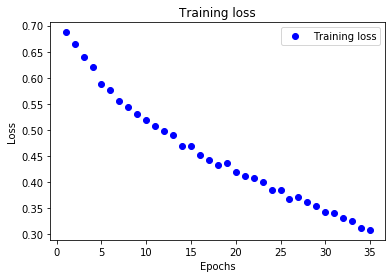

In [26]:
import matplotlib.pyplot as plt

loss = history.history['loss']

epochs = range(1,len(loss) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### 훈련과 검증 정확도 그리기

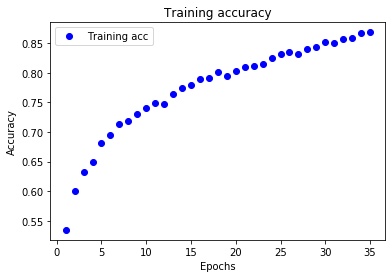

In [27]:
plt.clf() #그래프 초기화

acc = history.history['acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### 테스트 데이터에서 잘 작동하는지 확인

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

2000/2000 [==============================] - 8s 4ms/step


In [29]:
print('test_loss:', test_loss, 'test_acc:', test_acc)

test_loss: 0.4724155170917511 test_acc: 0.778


In [30]:
model.